#  King County House Price Prediction

# Abstract

This dataset we are using consists of house sale prices for King County. The purpose of this analysis is to determine what factors affect the price of the houses. It is to use various types of machine learning techniques to establish relationships between the various features and the price of the houses using the various data that the features provide us. This analysis is divided into two categories. First, we will be using machine learning algorithms for classification. For this purpose, we will convert price which is a continuous variable into a categorical variable having two values for binary classification. Then we use Random forest classifier (bagging algorithm) and XGboost classifier (boosting algorithm) to perform classification. We then use Logistic regression. For the second part, we perform regression on price which is a continuous variable using Random forest regressor and XGboost regressor. Then we use Liner Regression to predict house prices and use Ridge regularization to handle overfitting. For the last part, we again go back to classification and use K-Nearest Neighbors to perform binary classification. Throughout our analysis, we have used some form of hyperparameter tuning using either Grid search or Random search to find the best hyperparameters for our machine learning algorithms. Finally, to conclude we will compare the algorithms for classification using the metric Area Under the Curve(AUC) and for regression we use Average error and Accuracy to evaluate and determine to best ones for our prediction task. 



## Approach

Algorithms used.

* For Part A:
    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier
* For Part B:
    * Logistic Regression
* For Part C:
    * Bagging Algo : Random Forest Regressor
    * Boosting Algo : XGBoost Regressor
* For Part D:
    * Linear Regression and used Ridge Regularization 
* For Part E:
    * K-Nearest Neighbour Classifier       


## Dataset
* King County House Price prediction [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)  This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  
* In order to perform classification tasks, I have converted the price quantitative variable to a binary classification variable with HIGH price as 1 and LOW price as -1(For logistic regression I am taking LOW as 0)

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [10]:
import numpy
numpy.version.version

'1.14.6'

In [46]:
features = pd.read_csv('C:\BDI\CSYE_7245-master\CSYE_7245-master\Assignments\king_county_cleansed.csv')

### Exploratory Data Analysis

In [15]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [16]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
print(features.isnull().sum())

index               0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
waterfront          0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement_present    0
renovated           0
floors#1.0          0
floors#1.5          0
floors#2.0          0
floors#2.5          0
floors#3.0          0
floors#3.5          0
view#0              0
view#1              0
view#2              0
view#3              0
view#4              0
condition#1         0
condition#2         0
condition#3         0
condition#4         0
condition#5         0
grade#1             0
grade#3             0
grade#4             0
grade#5             0
grade#6             0
grade#7             0
grade#8             0
grade#9             0
grade#10            0
grade#11            0
grade#12            0
grade#13            0
zipcode#98

In [18]:
features.corr()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
index,1.000000,0.027372,0.010794,0.107334,0.044717,-0.026877,-0.007611,0.071958,-0.041841,0.199549,...,0.029846,0.010800,-0.000965,-0.005220,-0.002875,-0.005518,-0.008781,-0.012813,-0.004476,-0.012021
price,0.027372,1.000000,0.308350,0.525138,0.702035,0.089661,0.266369,0.605567,0.323816,0.054012,...,0.340799,0.357412,0.290834,0.211803,-0.004510,-0.000961,-0.004975,-0.001124,0.005697,0.005056
bedrooms,0.010794,0.308350,1.000000,0.515884,0.576671,0.031703,-0.006582,0.477600,0.303093,0.154178,...,0.135760,0.116428,0.059196,0.038916,-0.003127,0.000760,0.002513,0.007289,0.004616,0.001939
bathrooms,0.107334,0.525138,0.515884,1.000000,0.754665,0.087740,0.063744,0.685342,0.283770,0.506019,...,0.272438,0.247012,0.156661,0.094971,-0.002438,-0.001123,-0.004248,0.002780,-0.005300,0.007353
sqft_living,0.044717,0.702035,0.576671,0.754665,1.000000,0.172826,0.103818,0.876597,0.435043,0.318049,...,0.369058,0.345771,0.238806,0.144329,-0.005108,-0.000163,-0.004384,0.005934,0.007276,0.016209
sqft_lot,-0.026877,0.089661,0.031703,0.087740,0.172826,1.000000,0.021604,0.183512,0.015286,0.053080,...,0.074335,0.077035,0.061535,0.007758,-0.000369,-0.006477,-0.003818,0.004688,0.013673,-0.003366
waterfront,-0.007611,0.266369,-0.006582,0.063744,0.103818,0.021604,1.000000,0.072075,0.080588,-0.026161,...,0.046646,0.067503,0.085717,-0.002139,-0.006187,-0.006091,-0.006206,-0.004962,-0.004198,0.008828
sqft_above,0.071958,0.605567,0.477600,0.685342,0.876597,0.183512,0.072075,1.000000,-0.051943,0.423898,...,0.376160,0.341966,0.223412,0.126575,-0.005190,-0.002191,-0.007611,0.006715,-0.001111,0.015883
sqft_basement,-0.041841,0.323816,0.303093,0.283770,0.435043,0.015286,0.080588,-0.051943,1.000000,-0.133124,...,0.062053,0.077705,0.077555,0.062683,-0.000889,0.003761,0.005144,-0.000251,0.017180,0.003920
yr_built,0.199549,0.054012,0.154178,0.506019,0.318049,0.053080,-0.026161,0.423898,-0.133124,1.000000,...,0.148728,0.098705,0.047053,0.004686,0.000136,-0.007375,-0.000324,-0.004964,-0.019681,0.015291


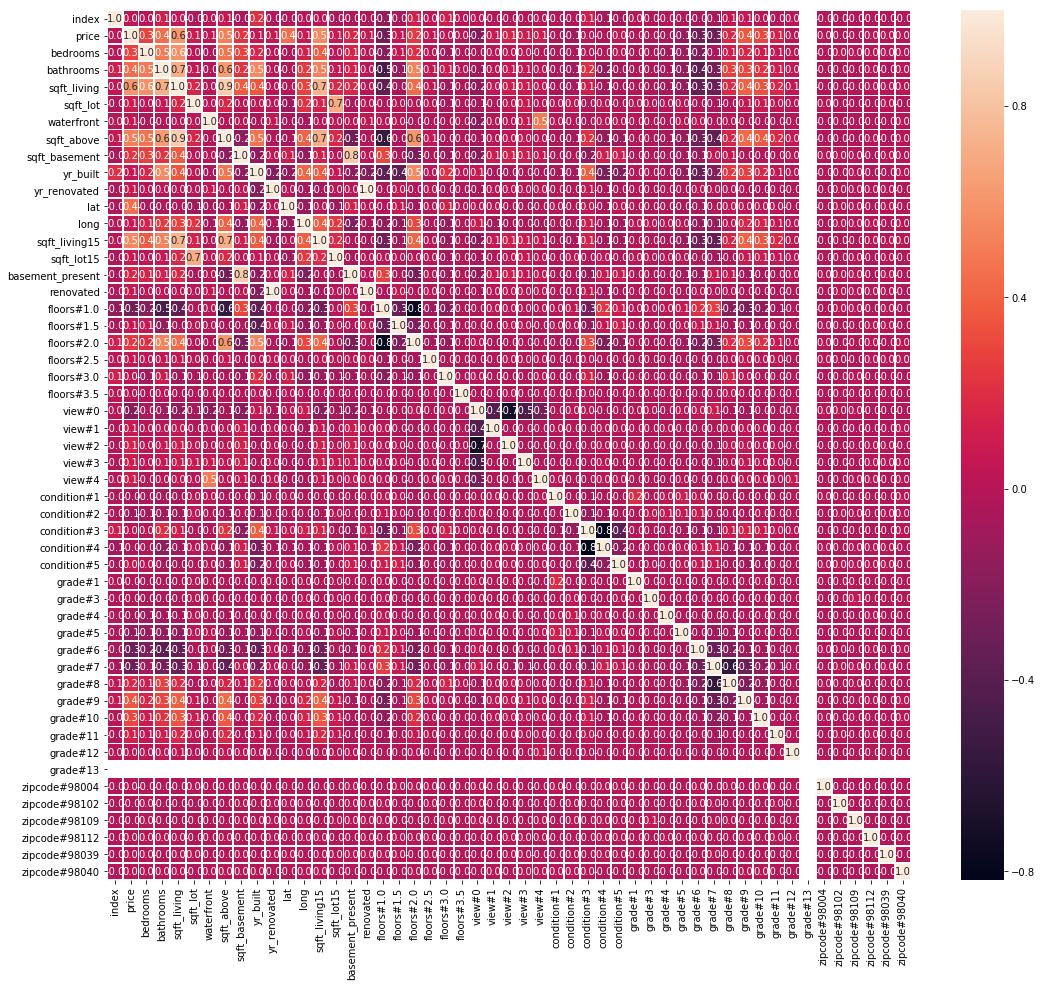

In [63]:
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(features.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

We created a heatmap to understand how the different paramenters are related to each other. According to the above heatmap bathrooms, squarefeet per living, sqft_above, sqft_living15 have the most coorelation with price which is our target variable which is the price of the property. 


**Lets plot the price distribution**

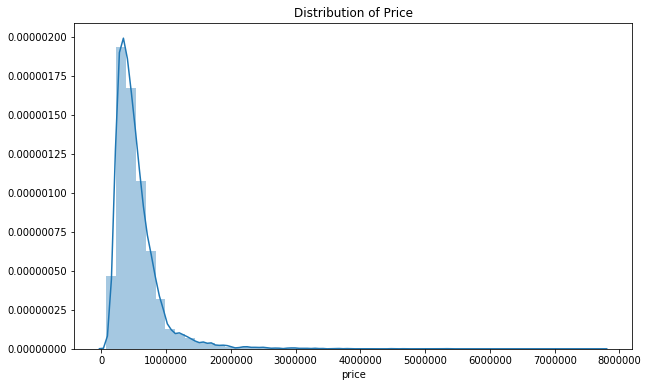

In [24]:
plt.figure(figsize = (10, 6))
sns.distplot(features['price']);
plt.title('Distribution of Price');

We can see that the major price distribution is between $ 0 and $ 1.3 million. After $1.3 mil its just outliers and does not contribute much to our analysis so lets go ahead an remove the outliers.

In [54]:
features = features[features.price < 1300000]

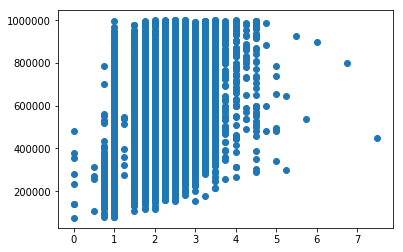

In [65]:
plt.scatter(features['bathrooms'], features['price'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.


We can see that with more than 5 bedrooms the price don't follow any pattern.

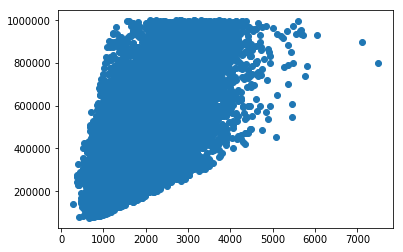

In [69]:
plt.scatter(features['sqft_living'], features['price'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.


For the purpose of binary classification, we need to convert price into two binary catagories. We will set the price of houses above the median to 1 and the one lower than median to -1.

In [75]:
median = features['price'].median()
median

433000.0

Adding column to dataframe for holding categorical price value : HIGH/LOW

All values < median are LOW and Values >= median are HIGH

In [76]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median else -1)

In [13]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


## Modeling 

## Part A

    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [17]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       


In [31]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,3,2.25,1970,35100,0,1970,0,1977,0,47.4635,...,0,0,0,0,0,0,0,0,0,0
1,3,2.50,2600,4750,0,1700,900,1951,0,47.6833,...,0,0,0,0,0,0,0,0,0,0
2,5,2.50,2820,67518,0,2820,0,1979,0,47.5794,...,0,0,0,0,0,0,0,0,0,0
3,4,2.50,3310,6500,0,3310,0,2012,0,47.5150,...,0,0,0,0,0,0,0,0,0,0
4,4,2.25,2160,8119,0,1080,1080,1966,0,47.5443,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y = np.array(y)
X = np.array(X)

We use numpy to convert the features and label into an array because that is the way the algorithms work. 

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
X_pred=clf.predict(X_train)


To evaluate how our model performed we will use a few metrics. The metrics we will use are accuracy score and Area under the cure(AUC). These are the commonly used metrics to evaluate classification models. 

Evaluating for **Training Data**

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, X_pred))

Accuracy: 0.9986780355608434


In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, X_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9986799691591722


Evaluating for **Test data**

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9071560764959902


In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9071525430050378


The accuracy score of our model is 90% and the AUC is 0.90. AUC ranges from 0 to 1. The closer the value to one the better our model performs. We can see there is a differency in performance on the training set and the testing set. The model appears to be slightly overfitting.  

Lets now try to improve the model further. One of the ways would be to find features that are more important and eliminate the one's that are not important. 

In [56]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 0.276886
sqft_living         0.107895
sqft_living15       0.094201
sqft_above          0.078986
long                0.055140
sqft_lot15          0.053367
yr_built            0.050560
sqft_lot            0.046590
bathrooms           0.042955
grade#7             0.032612
sqft_basement       0.026838
bedrooms            0.017609
grade#6             0.014506
grade#9             0.013680
grade#8             0.012588
basement_present    0.009585
floors#1.0          0.009202
view#0              0.008704
floors#2.0          0.006788
condition#3         0.005867
condition#4         0.004370
floors#1.5          0.003714
grade#10            0.003577
condition#5         0.003286
yr_renovated        0.003230
view#2              0.002256
renovated           0.001907
view#3              0.001496
view#4              0.001442
waterfront          0.001177
floors#3.0          0.001145
zipcode#98004       0.001067
zipcode#98040       0.001023
zipcode#98112       0.000981
view#1        

In [57]:
top_features = feature_imp.head(10)
top_features

lat              0.276886
sqft_living      0.107895
sqft_living15    0.094201
sqft_above       0.078986
long             0.055140
sqft_lot15       0.053367
yr_built         0.050560
sqft_lot         0.046590
bathrooms        0.042955
grade#7          0.032612
dtype: float64

No handles with labels found to put in legend.


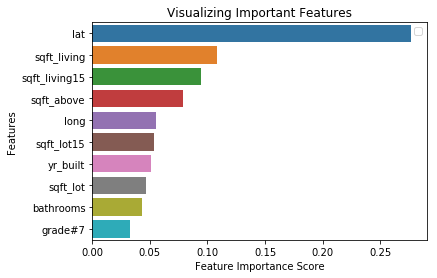

In [58]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

So from the vizualization above we now know which features are important and which ones we can eliminate. We can eliminate features like grade1, floor# 3.5 etc.

In [20]:
X1=features[['lat','sqft_living','sqft_living15','sqft_above','long','sqft_lot15','yr_built','sqft_lot','bathrooms','grade#7']]  # Features

y1=features['price_cat']  # Labels

In [21]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
y1 = np.array(y1)
X1 = np.array(X1)

In [22]:
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3) # 70% training and 30% test

Another way of improving our model is to find better hyperparameters for our Randomforest. Firstly lets check what hyperparameters did we use for our RandomForest classifer. 

In [63]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


According to the documentation, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). 

### Finding important hyper-parameters

The important parameters for a Random Forest Classfier are as follows:



### We will use RandomSearchCV and GridSearchCV to find the best values for the same

**Random Search** 
<br>
We'll use a basic form of hyperparameter tuning, random search. This means constructing a parameter grid and then randomly selecting combinations of values, evaluating them in cross validation, and determining which combination performs the best. This is can be done using the RandomizedSearchCV in Scikit-Learn.



In [66]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node                   
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]}


In [81]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   59.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [82]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

The above were the best parameters found after doing a random search.

**Predictions using the new model**

In [84]:
y1_pred=clf_random.predict(X1_test)
X1_pred=clf_random.predict(X1_train)

Evaluating for **Training Data** after dropping features and using new hyperparameters

In [85]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_train, X1_pred))

Accuracy: 0.9689999339017781


In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y1_train, X1_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9690023956613115


Evaluating for **Test data**

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))


Accuracy: 0.9071560764959902


In [88]:
fpr, tpr, thresholds = metrics.roc_curve(y1_test, y1_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9048526948842873


# Trying with old features and label 

In [89]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [90]:
y2_pred=clf_random.predict(X_test)
X2_pred=clf_random.predict(X_train)

Evaluating for **Training Data** after dropping features and using new hyperparameters

In [91]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, X2_pred))

Accuracy: 0.9813603014078921


In [92]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, X2_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9813546004182365


Evaluating for **Test data**

In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))


Accuracy: 0.9088525601480567


In [94]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y2_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9088595572818845


We can observe that using the new features vs the old features do not have and significant impact on the testing data, however it does have some effect on the training data. The training accurace with the new features have reduced by a few point. So the difference between test and train accuracy has reduced. This indicates that the new features are helping he reduce overfitting. Hence, we will continue using the new features for further analysis. 

In [4]:
from sklearn.ensemble import RandomForestClassifier

### Grid Search with Cross Validation

In [5]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [96]:
grid_search.fit(X1_train, y1_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [97]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 2000}

**Predictions using the Grid search parameters**

In [98]:
y1_pred= grid_search.predict(X1_test)
X1_pred= grid_search.predict(X1_train)

Evaluating for **Training Data** after dropping features and using new hyperparameters

In [99]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_train, X1_pred))

Accuracy: 0.9746182827681935


In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y1_train, X1_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9746382387117613


Evaluating for **Test data**

In [101]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))


Accuracy: 0.905613818630475


In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y1_test, y1_pred)
print("AUC: ",metrics.auc(fpr, tpr))

AUC:  0.9055819884287454


Results show no significant change in the accuracy or the AUC. 

### Now lets implement XGBoost (eXtreme Gradient Boosting) 

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [44]:
!pip install xgboost

In [45]:
import xgboost

In [3]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [105]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
y1_pred= grid_search.predict(X1_test)
X1_pred= grid_search.predict(X1_train)

In [116]:
y1_pred = xgBoostClassifierModel.predict(X1_test)
X1_pred= xgBoostClassifierModel.predict(X1_train)
#predictions = [round(value) for value in y_pred]

**For Training data**

In [118]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_train, X1_pred))

fpr, tpr, thresholds = metrics.roc_curve(y1_train, X1_pred)
print("AUC: ",metrics.auc(fpr, tpr))


Accuracy: 0.9103047128032256
AUC:  0.9103787577938521


**For Testing data**

In [119]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

fpr, tpr, thresholds = metrics.roc_curve(y1_test, y1_pred)
print("AUC: ",metrics.auc(fpr, tpr))


Accuracy: 0.8980567550894509
AUC:  0.8979537149817296


Apparently XGboot is performing much better in terms of helping us reducing overfitting. This can be seen from our training and testing results. One of the reasons is that XGboost uses Regularization. 

**Lets Find the ideal hyperparameters to improve the performance of XGboost**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.214872 using {'n_estimators': 350}
-0.259824 (0.010874) with: {'n_estimators': 50}
-0.233647 (0.012182) with: {'n_estimators': 100}
-0.224254 (0.013691) with: {'n_estimators': 150}
-0.219749 (0.014349) with: {'n_estimators': 200}
-0.217302 (0.014460) with: {'n_estimators': 250}
-0.215776 (0.014676) with: {'n_estimators': 300}
-0.214872 (0.014838) with: {'n_estimators': 350}


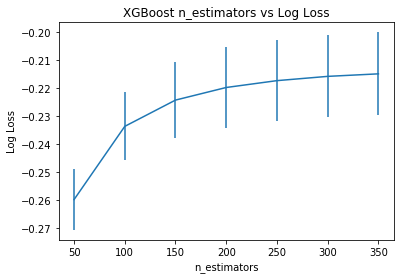

In [121]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.214872, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [122]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.9s finished


Best: -0.211460 using {'max_depth': 7}
-0.334212 (0.005696) with: {'max_depth': 1}
-0.233647 (0.012182) with: {'max_depth': 3}
-0.215708 (0.013370) with: {'max_depth': 5}
-0.211460 (0.016390) with: {'max_depth': 7}
-0.215534 (0.017841) with: {'max_depth': 9}


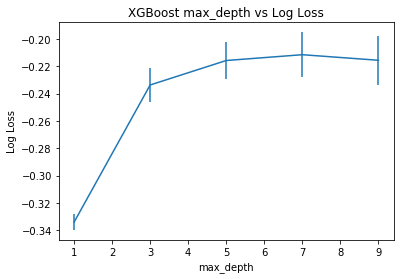

In [133]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.


### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.



In [134]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 12.7min finished


Best: -0.213515 using {'max_depth': 6, 'n_estimators': 250}
-0.217402 (0.018611) with: {'max_depth': 6, 'n_estimators': 350}
-0.215139 (0.018074) with: {'max_depth': 6, 'n_estimators': 300}
-0.213515 (0.017738) with: {'max_depth': 6, 'n_estimators': 250}
-0.219337 (0.019184) with: {'max_depth': 6, 'n_estimators': 400}
-0.222668 (0.021411) with: {'max_depth': 7, 'n_estimators': 350}
-0.218975 (0.020476) with: {'max_depth': 7, 'n_estimators': 300}
-0.216291 (0.019847) with: {'max_depth': 7, 'n_estimators': 250}
-0.226330 (0.022347) with: {'max_depth': 7, 'n_estimators': 400}
-0.230207 (0.021163) with: {'max_depth': 8, 'n_estimators': 350}
-0.226195 (0.020730) with: {'max_depth': 8, 'n_estimators': 300}
-0.222101 (0.019710) with: {'max_depth': 8, 'n_estimators': 250}
-0.234866 (0.021927) with: {'max_depth': 8, 'n_estimators': 400}
-0.239515 (0.025406) with: {'max_depth': 9, 'n_estimators': 350}
-0.233685 (0.024297) with: {'max_depth': 9, 'n_estimators': 300}
-0.228819 (0.022882) with: {'m

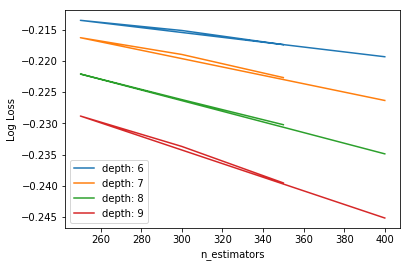

In [135]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters


In [4]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [5]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [23]:
model.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
y1_pred= model.predict(X1_test)
X1_pred= model.predict(X1_train)

**For Training data**

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_train, X1_pred))

fpr, tpr, thresholds = metrics.roc_curve(y1_train, X1_pred)
print("AUC: ",metrics.auc(fpr, tpr))


Accuracy: 0.9715116663361756
AUC:  0.971520950961566


**For Testing data**

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

fpr, tpr, thresholds = metrics.roc_curve(y1_test, y1_pred)
print("AUC: ",metrics.auc(fpr, tpr))


Accuracy: 0.9063849475632326
AUC:  0.9063040984585403


Thus hyperparameter tuning did improve the accuracy of our XGboost model and it also reducted overfitting to an extent. It performed better that the previous bagging model. 

## Classification with Logistic Regression

Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

* Which independent variables are important?
* Is there multi-colinearity?
* How does it compare to the the models in Part A?

We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [33]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median else 0)

In [34]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [35]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [36]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [37]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Sat, 26 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        16:28:55   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

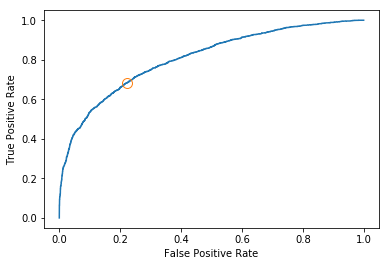

In [39]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

**For Testing data**

In [40]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8078695178147917

**For Training data**

In [42]:
falsepos,truepos,thresholds=roc_curve(y_train_log,logreg.decision_function(X_train_log))
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.8115866915703769

## As compared to Models in Part A, the accuracy of the Logistic Regression model is less. 

## Regression with Trees 
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem.


### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [51]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg =features[['lat','sqft_living','sqft_living15','sqft_above','long','sqft_lot15','yr_built','sqft_lot','bathrooms','grade#7']]

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

**Evaluating for test data**

In [60]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 82543.4652 degrees.
Accuracy = 84.75%.


In [61]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=57, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 76910.1211 degrees.
Accuracy = 85.64%.


Using new paramaters improves the performance slightly.

### Grid Search with Cross Validation

In [64]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [65]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 10.3min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 300}

In [71]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 77357.0361 degrees.
Accuracy = 85.43%.


## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [72]:
from xgboost import XGBRegressor

In [73]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 87882.5308 degrees.
Accuracy = 83.31%.


In [74]:
base_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [77]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.710273 using {'n_estimators': 350}
0.677520 (0.012542) with: {'n_estimators': 50}
0.690988 (0.013199) with: {'n_estimators': 100}
0.697362 (0.013390) with: {'n_estimators': 150}
0.702544 (0.013505) with: {'n_estimators': 200}
0.705946 (0.013559) with: {'n_estimators': 250}
0.708141 (0.013604) with: {'n_estimators': 300}
0.710273 (0.013626) with: {'n_estimators': 350}


In [78]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   18.3s finished
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.812790 using {'max_depth': 7}
0.636533 (0.037266) with: {'max_depth': 1}
0.770410 (0.024680) with: {'max_depth': 3}
0.803286 (0.020658) with: {'max_depth': 5}
0.812790 (0.020589) with: {'max_depth': 7}
0.811524 (0.023964) with: {'max_depth': 9}


In [79]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   16.8s finished
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.812790 using {'max_depth': 7}
0.636533 (0.037266) with: {'max_depth': 1}
0.770410 (0.024680) with: {'max_depth': 3}
0.803286 (0.020658) with: {'max_depth': 5}
0.812790 (0.020589) with: {'max_depth': 7}
0.811524 (0.023964) with: {'max_depth': 9}


In [80]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 76798.9221 degrees.
Accuracy = 85.79%.


### XGBoost Algo provides better predictions than Random Forest for the regression problem. 

**Lets now try using Linear Regression**

In [17]:
X_lin = features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]

#X_lin =features[['lat','sqft_living','sqft_living15','sqft_above','long','sqft_lot15','yr_built','sqft_lot','bathrooms','grade#7']]

y_lin=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.3) # 70% training and 30% test

In [131]:
#Initilise a linear regression model, fit the data and get scores
from sklearn.linear_model import LinearRegression 

lm = LinearRegression()
lm.fit(X_train_lin,y_train_lin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now lets make predictions using our liner model

Evaluating the accuracy for test data

In [135]:
best_accuracy = evaluate_reg(lm, X_test_lin, y_test_lin)

Model Performance
Average Error: 117405.3989 degrees.
Accuracy = 77.01%.


In [136]:
best_accuracy = evaluate_reg(lm, X_train_lin, y_train_lin)

Model Performance
Average Error: 119827.4493 degrees.
Accuracy = 76.80%.


**Regularization**

Regularization is a technique that discourages learning a more complex or flexible model so that it does not overfit. The main essence of regularization is to induce penalties to reduce the cost function. There are two techniques for Regularization, Ridge regression and Lasso regression. We will be performing Ridge regression.  

**Ridge Regression:** The main idea is to find a new line that does not fit the training data well. This is done by introducing a bias. Ridge regression reduces the sum of square residuals plus the product of λ and slope squared. λ is the tuning parameter that decides how much we want to penalize the flexibility of our model. When λ = 0, the penalty term has no eﬀect, and the estimates produced by ridge regression will be equal to least squares. However, as λ→∞, the impact of the shrinkage penalty grows, and the ridge regression coeﬃcient estimates will approach zero. Hence we need to find the ideal value of λ. For this we used K-folds Cross validation.   

In [95]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [139]:
steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=10)

In [140]:
cv.fit(X_train_lin, y_train_lin)

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dty

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input

C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ridge__alpha': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
       1.67683e-03, 2.02359e-03, 2.44205e-03, 2.94705e-0... 3.23746e-01, 3.90694e-01,
       4.71487e-01, 5.68987e-01, 6.86649e-01, 8.28643e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**Evaluate for test data**

In [141]:
best_accuracy = evaluate_reg(cv, X_test_lin , y_test_lin)

Model Performance
Average Error: 117404.9558 degrees.
Accuracy = 77.01%.


C:\Users\Abhishek\Anaconda3_NEW\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


**Lets implement KNN Classifier**

In [77]:

X_knn =features[['lat','sqft_living','sqft_living15','sqft_above','long','sqft_lot15','yr_built','sqft_lot','bathrooms','grade#7']]

y_knn=features['price_cat'] # Labels
       
# Split dataset into training set and test set
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3) # 70% training and 30% test

In [78]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train_knn, y_train_knn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Predictions using knn

In [79]:
y1_pred = knn.predict(X_test_knn)

**For Testing**

In [80]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_knn, y1_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test_knn, y1_pred)
print("AUC: ",metrics.auc(fpr, tpr))


Accuracy: 0.7006791452708299
AUC:  0.7006777377031836


In [81]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = { 'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1] }
# Create a based model
clf = KNeighborsClassifier(n_jobs=-1)
# Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [82]:
grid_search_knn.fit(X_train_knn, y_train_knn)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  3.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'leaf_size': [1, 2, 3, 5], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

Lets make prediction using the new parameters for testing data

In [83]:
y1_pred = grid_search_knn.predict(X_test_knn)

In [84]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_knn, y1_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test_knn, y1_pred)
print("AUC: ",metrics.auc(fpr, tpr))


Accuracy: 0.7175749544475732
AUC:  0.7175736570968361


The accuracy and the AUC only slighlty improvered with new hyperparameters for our KNN.

## Conclusions

So for our analysis we performed both regression and classification on the target variable price. For regression we used price as a continous variable and for classification we converted into a binary classs of 2 categories.  


We used different combinations of features, found be the best parameters for our algorithms using Grid search and Random search. We performed regularization for our Linear regression. After all this the best performances of our algorithms are summerized in the below table for classification and regression.



                                            **Classification Algorithm Summary**

| Algorithm | Area Under Curve(AUC) | 
| --- | --- | 
| Random Forest Classifier | 0.90 |
| XGboost Classifier | 0.90 |
| Logistic Regression | 0.80 |
| KNN Classifier | 0.71 |

                                            **Regression Algorithm Summary**

| Algorithm | Accuracy | 
| --- | --- | 
| Random Forest Regressor | 85.43 % |
| XGboost Regressor | 87.44 %|
| Linear Regression | 77 % |


XGboost was slightly better than Random forest in both classification and regression.

### Contributions

1. Perfomed EDA and cleaned the data
2. Used a common metric for model evaluation. AUC for classification and Accuracy score for regression. 
3. Used Grid search and Random search for finding optimum hyperparameters
4. Performed Ridge Regularization for Liner Regression

## Citations

* Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
* Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* XGBoost Classifier & XGBoost Regression : 
    * https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
    * https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
* Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/ 
* Linear Regression: https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net
* K-Nearest Neighbours: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/    

### License

Must have a license such as the MIT License [https://opensource.org/licenses/MIT](https://opensource.org/licenses/MIT)    